# Probability distributions and Monte Carlo methods

This notebook introduces you to the basics of probability distributions and their application in Monte Carlo simulations. In the last notebook we learned how to think in terms of probabilities and worked with a basic example. Very often we do not have access to a dataset of all possible outcomes (sample space) that we can query to see how probable different outcomes are (or any set of outcomes, which we called an **event**). This can be because there are far too many outcomes to list them all or because such a detailed data is simply not available. Even if we had this data, querying it every time we wanted to find the probability of some event is not the a very efficient way to get the answer. Instead, we can find the probability associated with each outcome in the sample space once and save it for future reference. This is basically what a probability distribution is: a sort of lookup table that we refer to when we need to find the probability of some event.

In [1]:
import numpy as np
import pandas as pd
import itertools
import scipy
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_palette('muted')
sns.set_style('ticks')

For example, we saw that if we roll two dice and get the sum, the sample space looks like this:

![Two dice sample space](../images/two-dice.jpg)

And so we can see for example that $P(\text{sum} = 6) = 5/36$ (since all outcomes are equally likely, we can just count how many squares have a 5 and divide by the total). But if we need to look up these probabilities often, it may be easier to just find the probability distribution and refer to it when needed.

In [2]:
two_dice = pd.DataFrame(itertools.product(range(1, 7), range(1, 7)), columns = ['one', 'two'])
two_dice['roll_sum'] = two_dice.apply(sum, axis = 1)

prob_dist = two_dice['roll_sum'].value_counts(normalize = True, sort = False)
prob_dist

roll_sum
2     0.027778
3     0.055556
4     0.083333
5     0.111111
6     0.138889
7     0.166667
8     0.138889
9     0.111111
10    0.083333
11    0.055556
12    0.027778
Name: proportion, dtype: float64

We can display the above distribution using a barplot. Since the sample space is limited to integers between 2 and 12, this is called a **discrete distribution**.

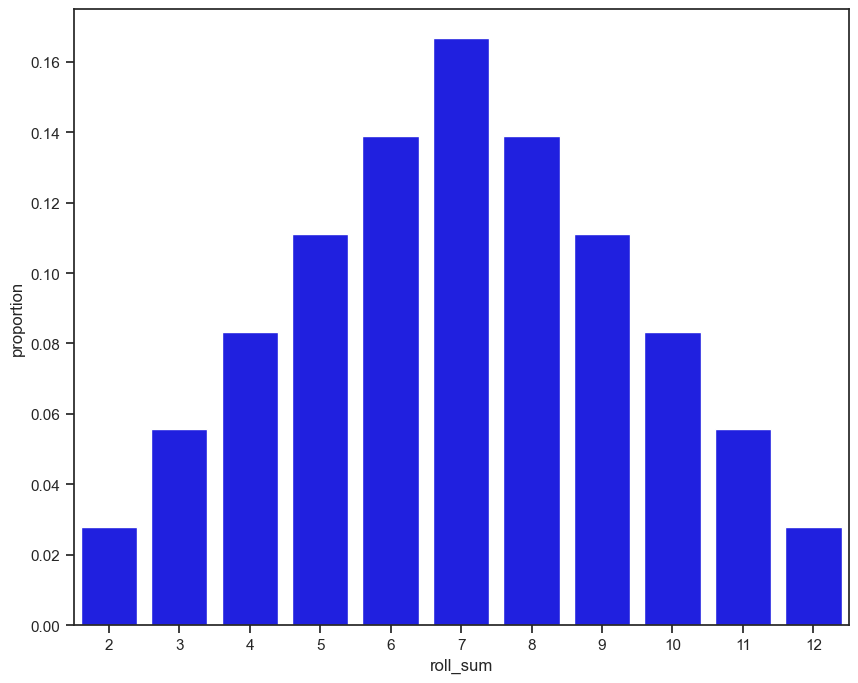

In [3]:
sns.barplot(x = prob_dist.index, y = prob_dist, color = 'blue');

Can we do even better than that? Maybe. We could try for example to encode the above distribution as a formula such as $P(k) = P(X = k) = -a|x - 7| + b$ with $x = \{2, 3, \cdots, 12\}$ and $a, b$ chosen so that $\sum_x P(x) = 1$. If we have such a formula, then to get $P(X = k)$ we just plug it into the function. No more querying the data. No more lookup tables.

Of course getting such a function for any distribution is not always easy to do, but for certain common scenarios such functions have been found and learning about them and how to use them is the topic of today.

## Discrete distributions

Discrete distributions are used to model the probability of events with discrete outcomes or states. Discrete distributions have a countable number of possible outcomes. The distribution measures the probability of each of these outcomes. We therefore call the distribution function the **probability mass function**.

The basic properties of discrete distributions are:

- The sum of the probabilities of all possible events must equal 1.
- The probability of an event is equal to the value of distribution at that point.
- All probabilities are strictly in the range 0-1.

### Discrete uniform distribution

This is the easiest of the distributions. Let's say you flip a fair coin. Then heads and tail have the same probability of happening, 50% each. In other words, the outcome of the coin flip follows a **uniform** distribution (equal probability), and because the options are limited to heads and tails it is **discrete**.

Another example is let's say you wake up in the morning and wonder what shirt to wear. If you have $20$ shirts and each is as likely to be selected as any other, then your choice of a shirt to wear follows a discrete uniform distribution and every short has a probability of $1/20$ to be selected.

### Bernoulli distribution

The coin toss example earlier can be generalized to **biased coins** using the Bernoulli distribution, which model trials with binary outcomes. For example, the flip of a coin can only result in two possible end states: heads or tails.

For an event with a binary outcome, $X \in \{0,1\}$ with probability $p$ of state 1, we can write the probability mass function for the Bernoulli distribution as:

$$P(X | p) = \bigg\{ 
\begin{matrix}
p &\text{if } X = 1\\
1 - p &\text{if } X = 0
\end{matrix}$$

Or as a one-liner: $P(X | p) = p^X + (1 - p)^{(1 - X)}$.

The Bernoulli distribution has mean $p$ and variance $p(1-p)$.

Let's explore the Bernoulli distribution. The code in the cell below computes the outcome of $1000$ Bernoulli trials with $p = 0.75$. The **theoretical and empirical** mean and variance for these trials are displayed. Execute this code and examine the results. How close are the empirical mean and variance to the theoretical mean and variance?

In [4]:
p = 0.75
sample_size = 10**6

bern_samples = np.random.binomial(1, p, sample_size) # draw samples from binomial distribution
bern_samples.shape

(1000000,)

In [5]:
print('theoretical mean p = %.6f, sample mean = %.6f' % (p, bern_samples.mean()))

theoretical mean p = 0.750000, sample mean = 0.749951


In [6]:
print('theoretical variance = %.3f, sample variance = %.3f' % (p * (1 - p), bern_samples.var()))

theoretical variance = 0.188, sample variance = 0.188


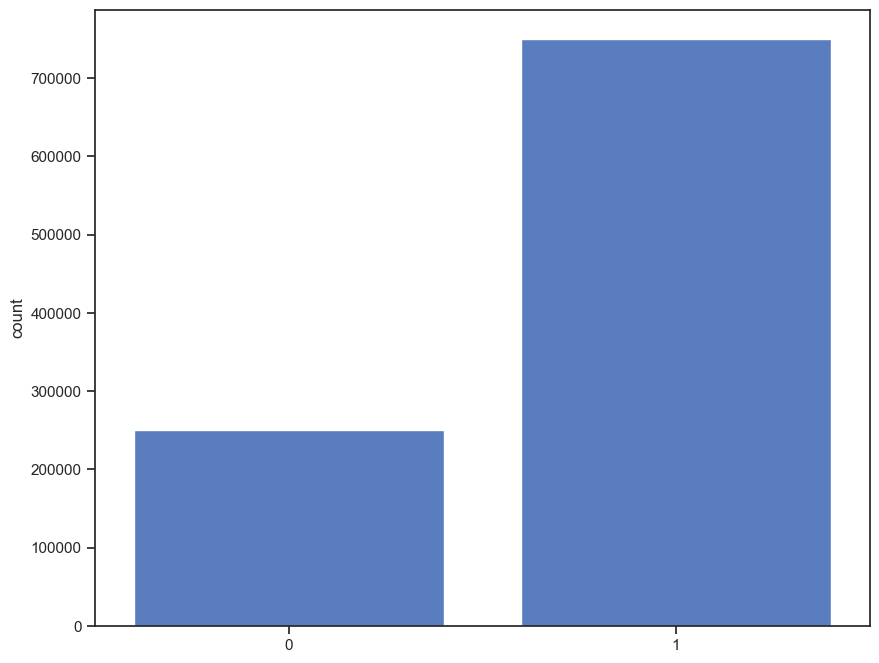

In [7]:
sns.countplot(x=bern_samples);

### Binomial distribution

If we perform $n$ independent Bernoulli trials with outcomes success and failure (or heads or tails, or 0 or 1), where $p$ is the probability of success, then the number of successes follows a binomial distribution.

$$P(X | n, p) = \binom{n}{X} p^X(1 - p)^{(n - X)}$$

Notice that the product includes the term $\binom{N}{X}$ since we must account for all possible combinations of outcomes from the trials. The theoretical mean and variance of the binomial distribution are $np$ and $np(1-p)$ respectively.

Let's try computing several binomial distributions, with probability of success $p = 0.75$, and letting $n$ take on the values $\{5, 25, 75 \}$. The code in the cell below computes $1000$ realizations of the binomial distribution for each value of $n$. The theoretical and sample means and variances are computed and printed for each case.

In [20]:
trials = np.array([75, 125, 175])
binom_samples = [np.random.binomial(n, p, sample_size) for n in trials]

binom_sample_means = [samples.mean() for samples in binom_samples]
binom_means = trials * p
pd.DataFrame({
    'theoretical mean': binom_means,
    'sample mean': binom_sample_means,
})

,theoretical mean,sample mean
0,56.25,56.248888
1,93.75,93.751293
2,131.25,131.235456


In [21]:
binom_sample_vars = [samples.var() for samples in binom_samples]
binom_vars = trials * p * (1 - p)
pd.DataFrame({
    'theoretical variance': binom_vars,
    'sample variance': binom_sample_vars
})

,theoretical variance,sample variance
0,14.0625,14.032307
1,23.4375,23.459652
2,32.8125,32.794578


In the cell below, create and execute the code to plot the simple histograms of the three binomial distributions in the `binom_samples` list. Do these distributions appear as you expect? 

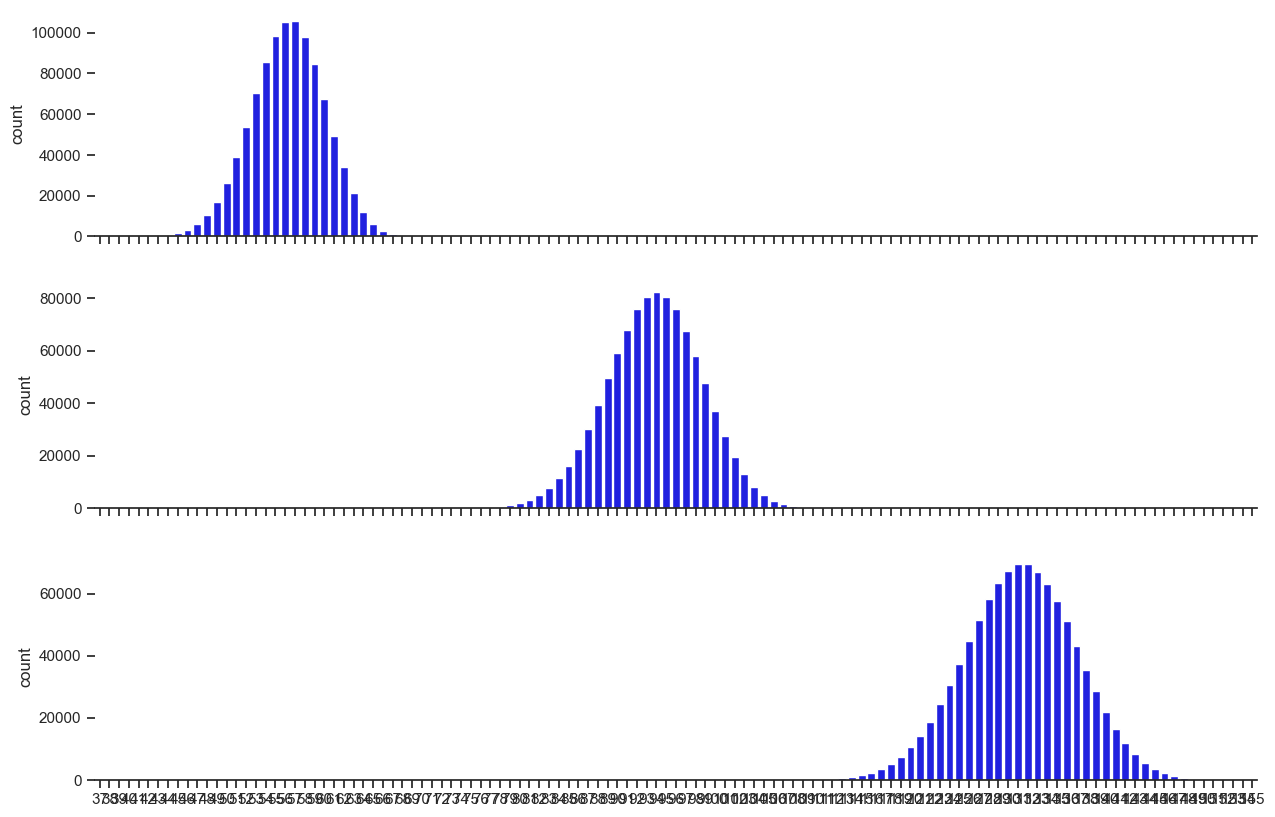

In [22]:
f, axes = plt.subplots(3, 1, sharex = True, figsize = (15, 10))
sns.despine(left = True)

sns.countplot(x=binom_samples[0], ax = axes[0], color = 'blue')
sns.countplot(x=binom_samples[1], ax = axes[1], color = 'blue')
sns.countplot(x=binom_samples[2], ax = axes[2], color = 'blue');

Notice that while the outcome of each Bernoulli trial is a discrete binary result, the result of multiple trials can take many discrete values. In fact, as $n$ becomes large the binomial distribution starts to look like a continuous distribution. In fact, the binomial distribution converges to the continuous **normal distribution** as $n \rightarrow \infty$. We will learn more about the normal distribution soon.

One last note: the binomial distribution works only with sequences **binary outcomes**, but there is a simple extension to the binomial distribution called the **multi-nomial distribution** which models sequences of events with a limited number of predefined outcomes (heads and tails, various colors, etc.).

### Poisson distribution

A common problem is modeling of the count of events occurring within some period of time. The Poisson distribution models the occurrence of events in a fixed interval of time. We say that the Poisson distribution models the probability of x **arrivals** within the time period.

In mathematical terms we write the Poisson distribution as:

$$ 
P(X\ |\ \lambda) = \frac{\lambda^X}{X!} \exp^{-\lambda}
$$

The theoretical mean and variance of the Poisson distribution are both equal to $\lambda$.

The code in the cell below computes $1000$ realizations of Poisson distributions with average arrival rates, $\lambda = \{ 1, 5, 25, 100\}$. The sample mean and variance for each distribution is then computed and printed along with the theoretical values.

In [36]:
lambdas = [1, 5, 25, 100]
poisson_samples = [np.random.poisson(l, size = 10000) for l in lambdas]

poisson_sample_means = [samples.mean() for samples in poisson_samples]
poisson_sample_vars = [samples.var() for samples in poisson_samples]

pd.DataFrame({
    'theoretical mean / variance': lambdas,
    'sample mean': poisson_sample_means,
    'sample variance': poisson_sample_vars,
})

,theoretical mean / variance,sample mean,sample variance
0,1,0.9961,0.988885
1,5,5.0500,5.109100
2,25,25.0639,24.955017
3,100,99.9458,101.729462


## Continuous distributions

Continuous distributions are used to model variables with continuous valued random variables. Physical measurements, such as weight, length and temperature are examples of variables with continuous variables. 

Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. We therefore call the distribution function the **probability density function**. This is in contrast to the **probability mass function** for discrete distributions. 

The probability of a value being in the range $(a, b)$ can be written as the integral of the probability density function over that range.

$$P(a < X < b) = \int_{a}^{b} P(X) dX$$

Notice that for a single exact value $a = b$, the probability is $0$.

Properties of continuous distributions are:

- The area under the distribution curve must be equal to 1, integrated over the range of possible values.
- The probability of a range of values of an event equals the **area** under the density curve over that range of values.
- Probabilities cannot have negative values.
- The probability of any single, exact value is 0.

### Continuous uniform distribution

A continuous uniform distribution has flat probability between limits $\{ a, b \}$ and $0$ outside that interval. The uniform distribution is used in a number of applications, including random selection of data and in simulation.

We can write the probability of the the uniform distribution as:

$$
P(a < X < b) = \Bigg\{ 
\begin{matrix}
\frac{1}{(b - a)} &\text{ if } a < X < b\\
0 &\text{ otherwise }
\end{matrix}
$$

The uniform distribution has mean $\frac{1}{2}(a + b)$ and variance $\frac{1}{2}(b - a)^2$.

The code in the cell below computes and plots the uniform distribution on the interval $\{ 0, 1 \}$, along with the kernel density plot.

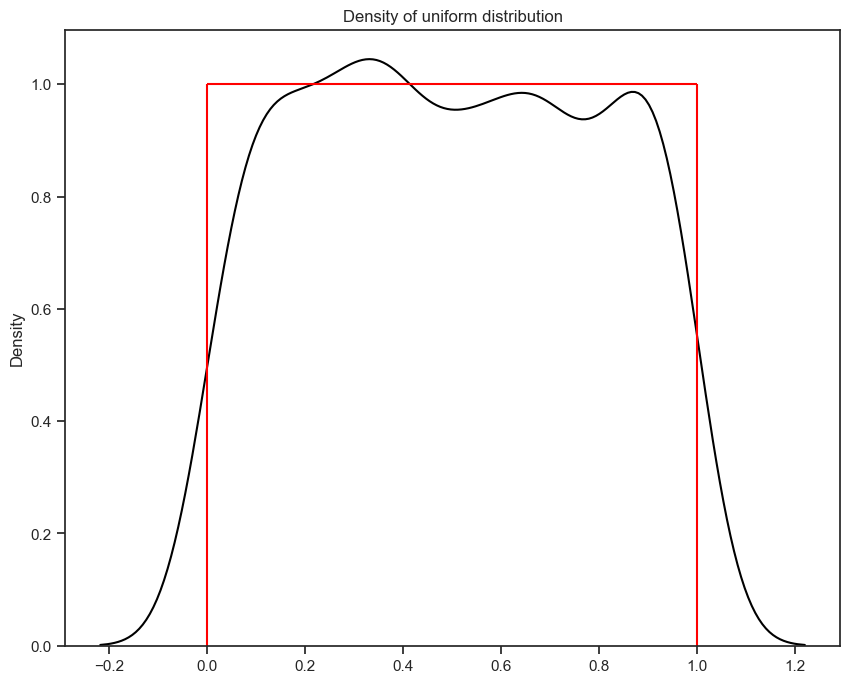

In [37]:
uniform_samples = np.random.uniform(0, 1, size = 1000)

# Plot the distribution of samples
sns.kdeplot(uniform_samples, color = 'black')

plt.vlines(0, 0, 1, colors = 'red')
plt.hlines(1, 0, 1, colors = 'red')
plt.vlines(1, 0, 1, colors = 'red')
plt.title('Density of uniform distribution')
plt.show()

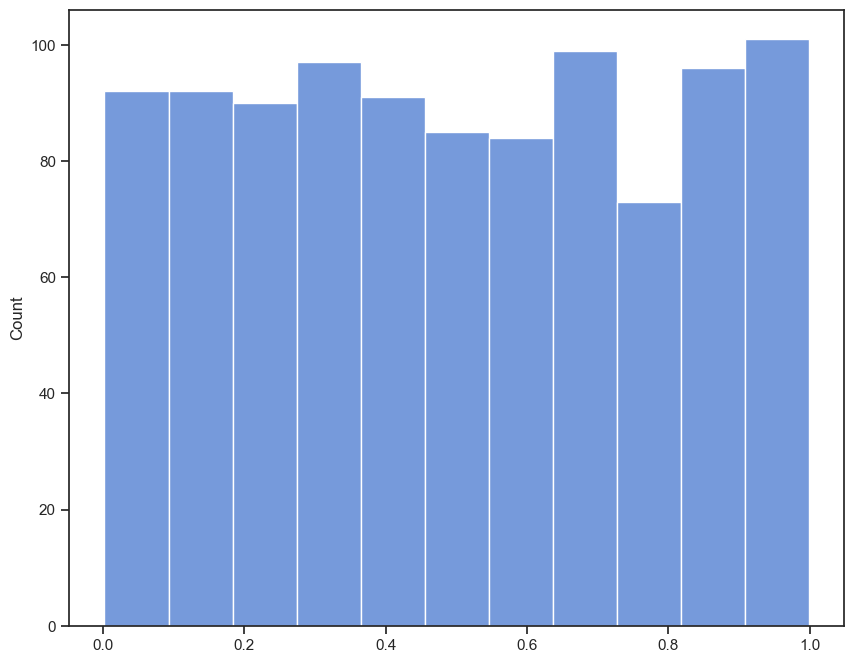

In [38]:
sns.histplot(uniform_samples, kde = False);

Let's try simulating some uniform distributions. The code in the cell below creates and plots the histogram uniform distributions with $\{100, 1000, 10000, 100000\}$ realizations, along with the theoretical density. Execute this code and examine the results. Notice how close each histogram is to the theoretical density. 

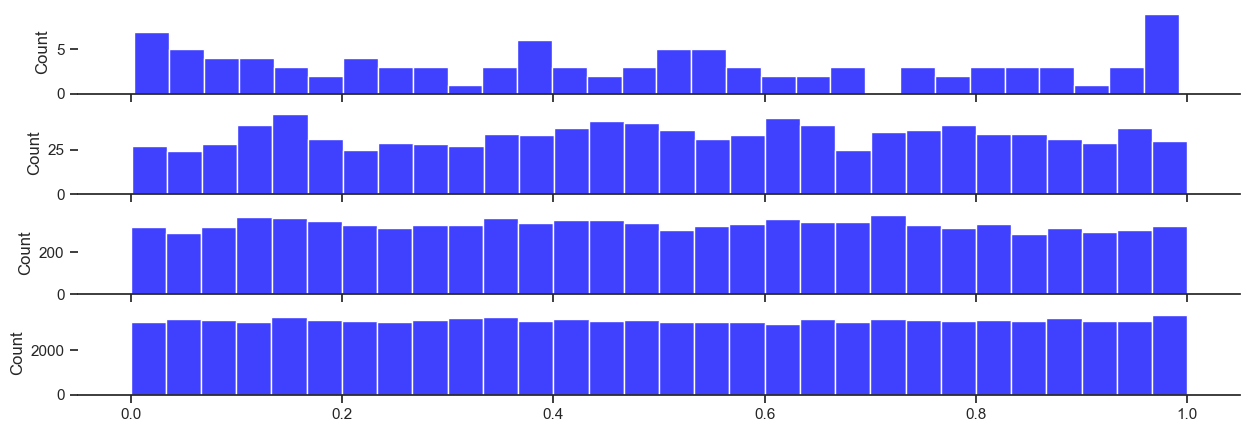

In [39]:
f, axes = plt.subplots(4, sharex = True, figsize = (15, 5))
sns.despine(left = True)

trials = [100, 1000, 10000, 100000]
nbins = 30 # how many bins to use for each histogram
for i in range(len(trials)):
    sns.histplot(np.random.uniform(0, 1, trials[i]), ax = axes[i], color = 'blue', kde = False, bins = nbins)

One fun application of probabilites the unfiorm distribution is [Bouffon's needle problem](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem). Solving it requires only basic understanding of calculus and multivariate calculus. The results show a surprising way that $\pi$ can be approximated!

### Normal Distribution

The normal distribution is one of the most widely used probability distributions. Any case where values are the result of product of a large number of processes will converge to a normal distribution. Many physical processes produce measurement values which are well modeled by a normal distribution or log-normal distribution.

For a normal distribution we can write the density function as:

$$P(X) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\frac{-(X - \mu)^2}{2 \sigma^2}}$$

The parameters are $\mu$ and $\sigma$ and happen to also be the mean and standard deviations of the theoretical distribution respectively. In other words, the distribution is defined by its center (mean) and scale (standard deviation). The normal distribution has other important properties. For example, around 68% of the data is within 1 standard deviation from the mean, and around 95% is within 2 standard deviations from the mean as can be seen below:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png" alt="Normal distribution">

Source: [Wikipedia](https://en.wikipedia.org/wiki/Probability_density_function)

The code in the cell below computes and plots the normal distribution for four different combinations of location and scale, as shown in the table:

| $\mu$ | $\sigma$ |
|:-----:|:-------:|
| 0     | 1       |
| 5     | 1       |
| 0     | 0.1     |
| 4     | 4       |

By the way, the normal distribution with $\mu = 0$ and $\sigma = 1$ is a little special and we call it the **standard normal distribution**. In fact, any normally-distributed can be generated by first drawing a sample from the standard normal distribution and adding $\mu$ to it and multiplying it by $\sigma$.

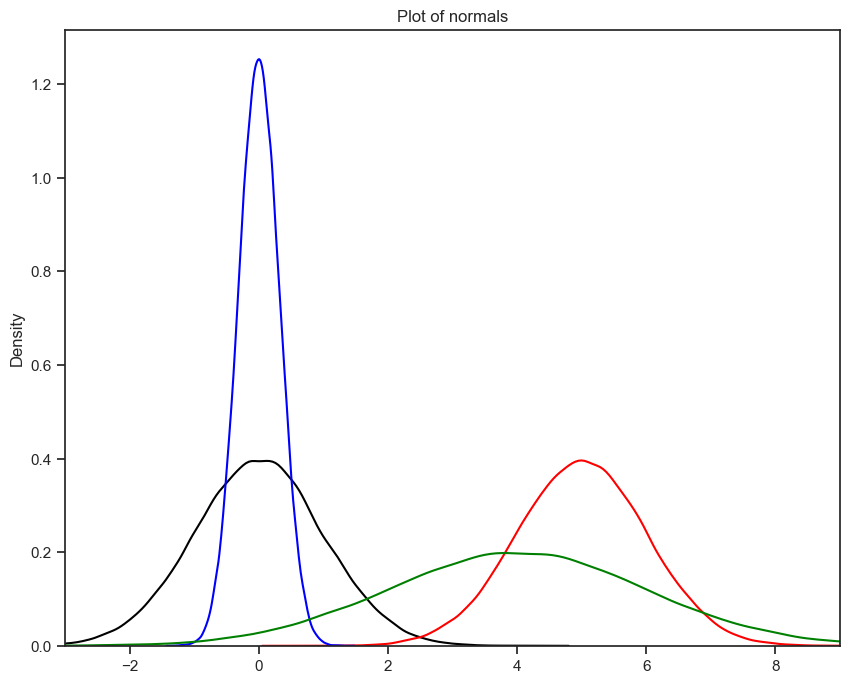

In [40]:
n = 100000

norm_params = [ # (mean, var)
    (0, 1),
    (5, 1),
    (0, .1),
    (4, 4)
]

norm_samples = [np.random.normal(mean, np.sqrt(var), n)
                for mean, var in norm_params]

plt.title('Plot of normals')
colors = ('black', 'red', 'blue', 'green')
for i, samples in enumerate(norm_samples):
    sns.kdeplot(samples, color = colors[i], label = 'N(%.1f, %.1f)' % norm_params[i])

plt.xlim(-3, 9);

We have now explored the basic properties of the normal distribution. The relationship between the the quantiles and the number of $\sigma$s to the left or right of center is another important property of the normal distribution. An understanding of this relationship provides some intuition about the likelihood of events under the normal distribution.

The code in the cell below plots a histogram of 100000 realizations of a standard normal distribution ($\mu = 0.0,\ \sigma = 1$). Vertical lines are plotted at $\sigma = \{-3, -2, -1,\ 0,\ 1,\ 2,\ 3\}$. Execute this code and examine the results. Notice that events become quite unlikely as $\sigma$ becomes large.

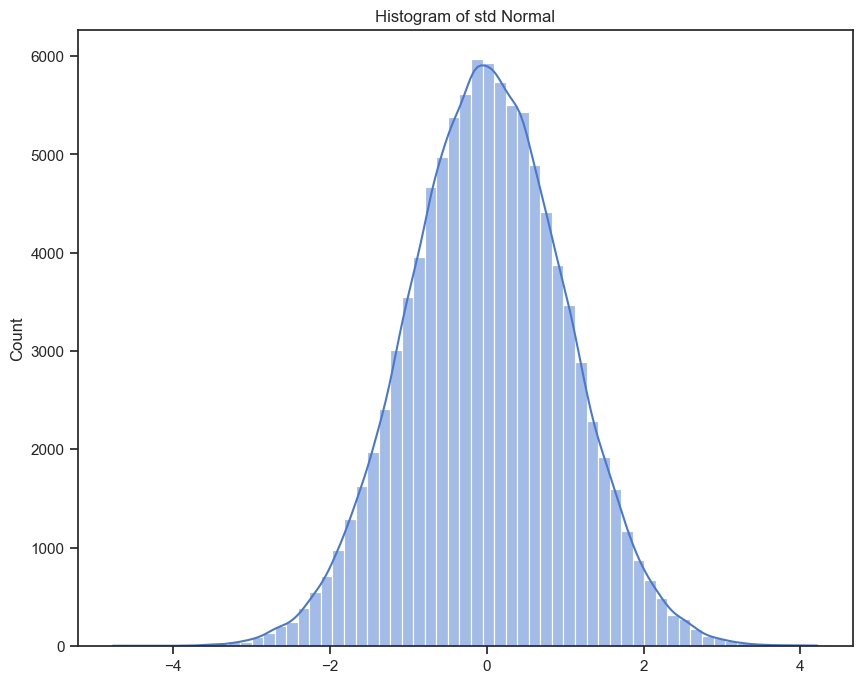

In [41]:
n = 100000

std_norm_samples = np.random.standard_normal(n)

plt.title('Histogram of std Normal')
sns.histplot(std_norm_samples, bins = 61,kde=True)
# Draw lines at each standard deviation from the mean
plt.vlines(range(-3, 4), 0, scipy.stats.norm.pdf(range(-3, 4)), color = 'red');

In [42]:
std_thresholds = range(-3, 4)
quantiles = scipy.stats.norm.cdf(std_thresholds, scale = 1, loc = 0)
pd.DataFrame({
    'std deviations': std_thresholds,
    'quantile': quantiles,
})

,std deviations,quantile
0,-3,0.001350
1,-2,0.022750
2,-1,0.158655
3,0,0.500000
4,1,0.841345
5,2,0.977250
6,3,0.998650


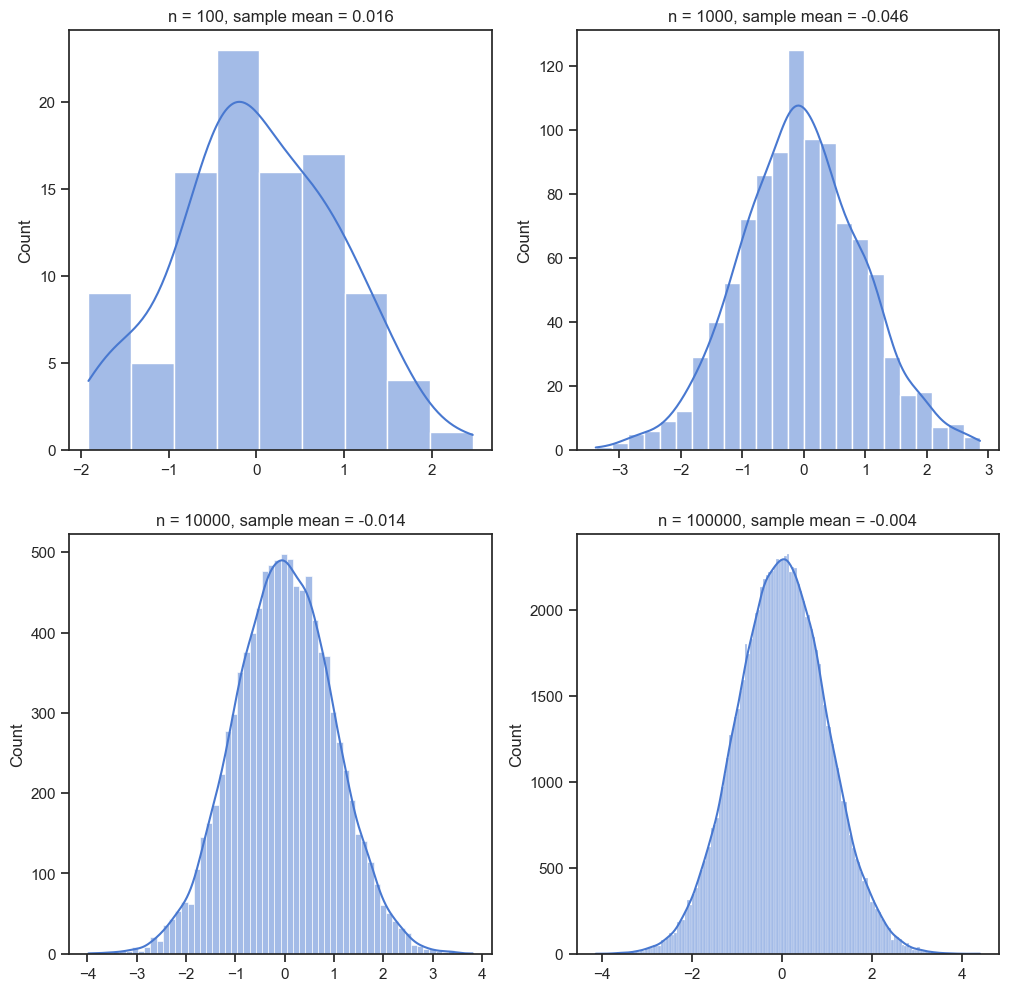

In [43]:
plt.figure(figsize = (12, 12))

for i, n in enumerate([100, 1000, 10000, 100000]):
    std_norm_samples = np.random.normal(loc = 0.0, scale = 1.0, size = n)
    title = 'n = %d, sample mean = %.3f' % (n, std_norm_samples.mean())
    plt.subplot(2, 2, i+1, title = title)
    sns.histplot(std_norm_samples,kde=True)

### Exercise

By convention, we call the function $F(x) = P(X \le x)$ the CDF (cumulative density function) of the random variable $X$, and the function $f(x) = P(X = x)$ the PDF (probability density function) of it. As we already mentioned, $P(X = x) = 0$ for any specific X = x, so the PDF of a random variable doesn't really have a good interpretation. Just think of it as the function (PDF), whose integral corresponds to another function (CDF) that for any value of $x$ gives you $P(X <= x)$. The CDF can be interpreted directly as a probability. In the `scipy` package we can access both of these functions for different distributions, for example `scipy.stats.norm.pdf` and `scipy.stats.norm.cdf` are the PDF and CDF of the normal distribution.

Let's say we have a normally distributed random variable $X$, defined (as we will see shortly) by its mean $\mu$ and standard deviation $\sigma$. The notation we use sometimes is $X \sim N(\mu, \sigma)$. Assuming $\mu = 4$ and $\sigma = 7$ let's first generate 10000 random points from this distribution and plot it.

/var/folders/72/0bcyzdyx7h3cvbp3wdsv12gh0000gn/T/ipykernel_2961/3627219012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(loc = mu, scale = sigma, size = 10000), bins = 100);


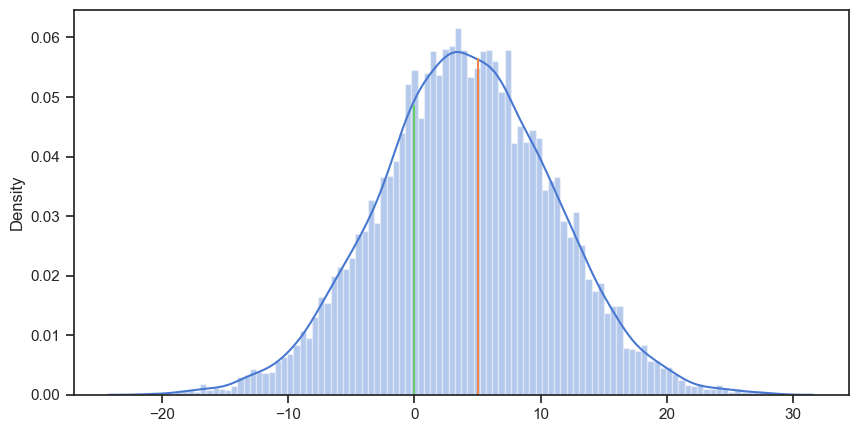

In [44]:
plt.figure(figsize = (10, 5))
mu, sigma = 4, 7
sns.distplot(np.random.normal(loc = mu, scale = sigma, size = 10000), bins = 100);
plt.plot([5, 5], [0, scipy.stats.norm.pdf(5, loc = mu, scale = sigma)]);
plt.plot([0, 0], [0, scipy.stats.norm.pdf(0, loc = mu, scale = sigma)]);

Find the following probabilities (HINT: use `scipy.stats.norm.cdf`):

- $P(X < 5)$ (area to the left of the orange line)
- $P(X > 5)$ (area to the right of the orange line)
- $P(0 < X < 5)$ (area between the green and orange line)

In [62]:
five = scipy.stats.norm.cdf(5, loc=mu, scale=sigma)
zero = scipy.stats.norm.cdf(0, loc=mu, scale=sigma)
total = scipy.stats.norm.cdf(sigma, loc=mu, scale=sigma)

five,zero,total

print(f"P(X<5) = {five}\nP(X>5) = {total - five}\nP(0<X<5) = {five - zero}")

P(X<5) = 0.5567984968164682
P(X>5) = 0.10908393228590718
P(0<X<5) = 0.2729439137177919


Let's see if we can show the relationship between a CDF and a PDF. Since at any point $x$ on the $x$ axis above, the PDF shows the hight of the above density plot and the CDF shows the area under it, let's show that we can estimate the CDF by numerically integrating the PDF. This is similar to approximating the area under the curve using the histogram in the above density plot. In calculus, this is called a **Riemann sum**.

In [49]:
delta_x = 0.001
lower_limit, upper_limit = 0, 5
interval_range = np.arange(lower_limit, upper_limit, delta_x)
sum([scipy.stats.norm.pdf(i, loc = mu, scale = sigma) * delta_x for i in interval_range])

np.float64(0.2729399101351119)

- Verify that the number we obtain above is an approximation for $P(0 < X < 5)$.

In [60]:
print(f"P(0<X<5) \t  = {five - zero}")
print(f"Approx. using PDF = {sum([scipy.stats.norm.pdf(i, loc = mu, scale = sigma) * delta_x for i in interval_range])}")

P(0<X<5) 	  = 0.2729439137177919
Approx. using PDF = 0.2729399101351119


- We can also ask the question the other way around. For example, earlier we asked what is $P(X < 3)$. Now we want to know at what value of $x$ we have $P(X < x) = 0.4$. HINT: This can be answered using `scipy.stats.norm.ppf`, which is the inverse function to `scipy.stats.norm.cdf`.

In [61]:
scipy.stats.norm.ppf(0.4,loc=mu,scale=sigma)

np.float64(2.226570278049402)

- We mentioned earlier that when data is normally distributed 68% of the data is within 1 standard deviation and 95% is within two standard deviations from the mean. Verify these claims computationally on 1000 data points generated from the standard normal distribution ($\mu = 0$ and $\sigma = 1$).

In [76]:
data = scipy.stats.norm.rvs(size=1000,loc=0,scale=1)
dev1 = np.mean((data > -1) & (data < 1))
dev2 = np.mean((data > -2) & (data < 2))

print(f"With mu = 0 and sigma = 1, we have\n{dev1*100:.2f}% of the data within 1 standard deviation\n{dev2*100:.2f}% of the data within 2 standard deviations")

With mu = 0 and sigma = 1, we have
69.70% of the data within 1 standard deviation
95.40% of the data within 2 standard deviations


### End of exercise

Similarly to the binomial distribution, it can be shown that as $\lambda$ increases the Poisson distribution approaches a continuous normal distribution. Notice how the poisson distributions below look more and more bell-curved as $\lambda$ increases.

/var/folders/72/0bcyzdyx7h3cvbp3wdsv12gh0000gn/T/ipykernel_2961/557889667.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(poisson_samples[str(l)], bins = 25, kde = False);


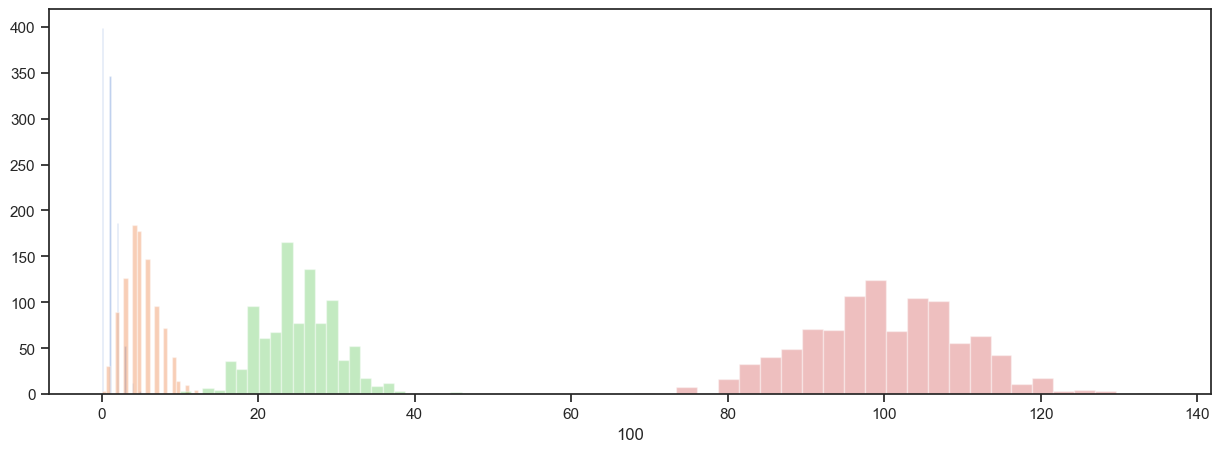

In [77]:
plt.figure(figsize = (15, 5))

lambdas = [1, 5, 25, 100]
poisson_samples = np.array([np.random.poisson(l, 1000) for l in lambdas]).transpose()
poisson_samples = pd.DataFrame(poisson_samples, columns = [str(l) for l in lambdas])
for l in lambdas:
    sns.distplot(poisson_samples[str(l)], bins = 25, kde = False);

The following plot shows how a poisson and normal distribution. 

/var/folders/72/0bcyzdyx7h3cvbp3wdsv12gh0000gn/T/ipykernel_2961/3158669412.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(poisson_samples, kde = False, color = "red")
/var/folders/72/0bcyzdyx7h3cvbp3wdsv12gh0000gn/T/ipykernel_2961/3158669412.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

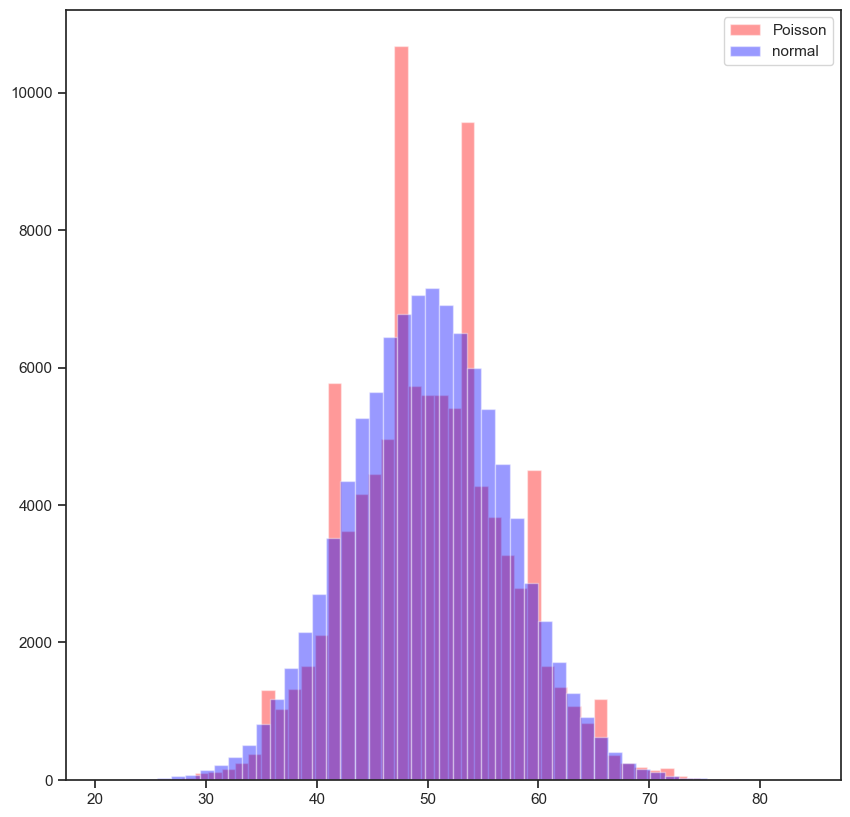

In [78]:
plt.figure(figsize = (10, 10))

lamb = 50
mu = lamb
sigma = lamb**0.5

num_samples = 100000
norm_samples = np.random.normal(loc = mu, scale = sigma, size = num_samples)
poisson_samples = np.random.poisson(lam = lamb, size = num_samples)
sns.distplot(poisson_samples, kde = False, color = "red")
sns.distplot(norm_samples, kde = False, color = "blue")
plt.legend(labels = ['Poisson', 'normal']);

To approximate the Poisson distribution with a normal distribution we need to apply the **continuity correction**:

$$P(50 <= X <= 60 | X\sim\text{Poisson}(\lambda)) \approx P(49.5 < X < 60.5 | X\sim\text{Normal}(\lambda, \lambda))$$

In [79]:
lamb = 55
mu = lamb
sigma = lamb**0.5

normal_apprx = scipy.stats.norm.cdf(60.5, loc = mu, scale = sigma) - scipy.stats.norm.cdf(49.5, loc = mu, scale = sigma)
poisson_prob = scipy.stats.poisson.cdf(60, mu = lamb) - scipy.stats.poisson.cdf(50, mu = lamb)
print("Normal approximation = {}, exact value = {}".format(normal_apprx, poisson_prob))

Normal approximation = 0.5416823058669205, exact value = 0.4971895099817797


### Log-Normal distribution

The normal distribution is defined for continuous random variables in the range $-\infty \le x \le \infty$. However, many quantities one can measure are only defined in a range $0 \lt x \le \infty$. Examples include, price, weight, length, and volume. 



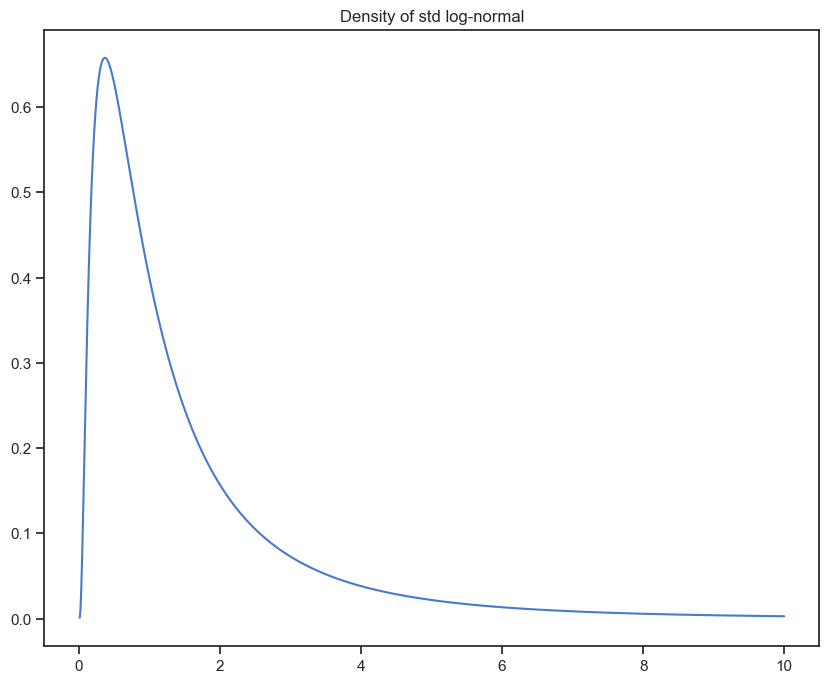

In [80]:
x = np.linspace(.01, 10, num = 10000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x=x, y=log_normal_pdf)
plt.title('Density of std log-normal');

The log-normal distribution is on log scale. You can transform the log-normal distribution to a normal distribution. In the cell below create and execute the code to **natural log transform the x variable** and plot the density.

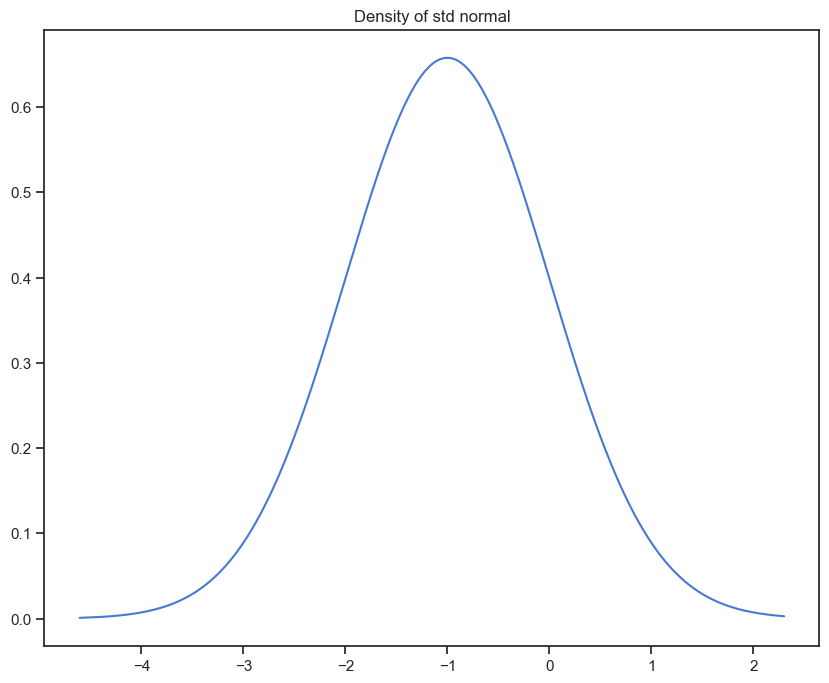

In [81]:
x = np.linspace(.01, 10, num = 10000)
x_log = np.log(x)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x=x_log, y=log_normal_pdf)
plt.title('Density of std normal');

**Note:** For exploration and evaluation if the distribution is log-normal, it is more appropriate to transform the graph to log scale on x-axis than manipulating the data:

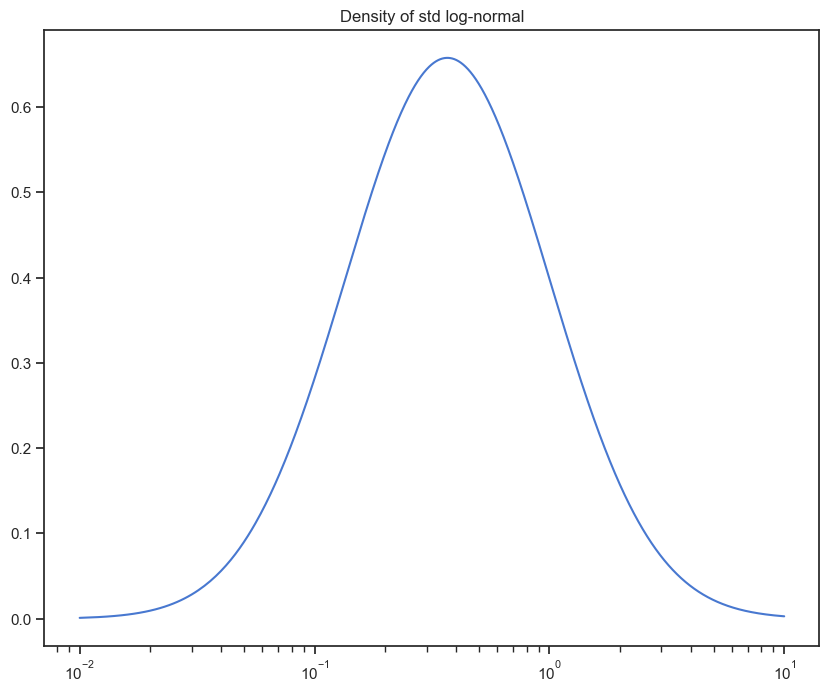

In [82]:
x = np.linspace(.01, 10, num = 10000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x=x, y=log_normal_pdf)
plt.title('Density of std log-normal')
plt.xscale('log')

### Student t-distribution

The student t-distribution is often just referred to as the t-distribution. This distribution is of importance in statistics since the error in the difference of the means of normally distributed variables are t-distributed. 

The t-distribution is defined in a somewhat different way from the other distributions we have looked at. It has one parameter, the degrees of freedom, denoted as $\nu$. The derivation of the density function for the t-distribution is a bit complicated and leads to the following, rather complex result:

$$
P(X | \nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\nu \pi} \Gamma(\frac{\nu}{2})} \bigg(1 + \frac{X^2}{\nu} \bigg)^{- \frac{\nu + 1}{2}}\\
$$

where $\Gamma(X)$ is called the Gamma function.

Despite the complex density formula, you can gain a fair feel for the behavior of the t-distribution by plotting it for several values of $\nu$ and comparing it to the normal distribution. The code in the cell below plots the density function for the t-distribution for degrees of freedom, $\nu = \{1, 2, 3, \infty \}$, along with a standard normal distribution. Execute this code and examine the results. Notice how the t-distribution is wider with heavier tails than the normal distribution. As $\nu \rightarrow \infty$ the t-distribution becomes identical to the normal distribution. 

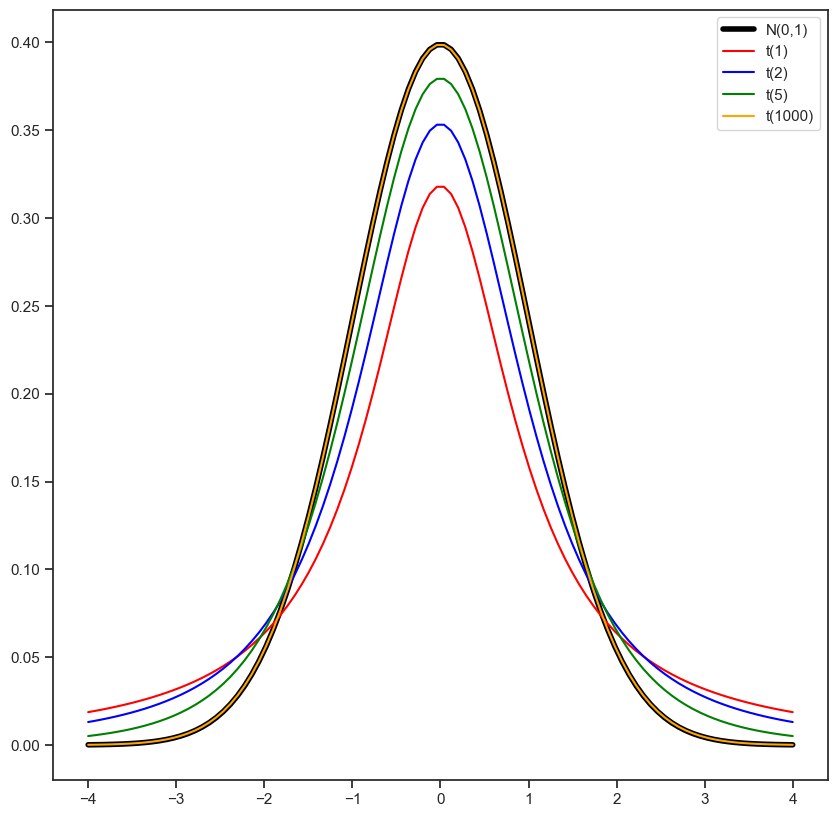

In [83]:
plt.figure(figsize = (10, 10))
x = np.linspace(-4, 4, num = 100)

sns.lineplot(x=x, y=scipy.stats.norm.pdf(x), color = 'black', linewidth = 4, label = 'N(0,1)')

for df, color in zip([1, 2, 5, 1000], ['red', 'blue', 'green', 'orange']):  
    sns.lineplot(x=x, y=scipy.stats.t.pdf(x, df), label = 't(%d)' % df, color = color);

## Exponential distribution

The gamma distributions are a complex family of continuous probability distributions. All distributions in the gamma family are only defined for $0 <= X <= \infty$.

We will look at one special cases of particular interest, the exponential distribution. The exponential distribution is used to model waiting times between events. We can write the formula for the probability density function of the exponential distribution as:

$$P(x | \lambda) = \bigg\{ 
\begin{matrix}
\lambda \exp^{- \lambda X} &\text{ if } X \ge 0\\
0 &\text{ if } X \lt 0
\end{matrix}
$$

with an expected value of $\lambda^{-1}$ and variance of $\lambda^{-2}$. Note that $\lambda$ is called the average time between events.

To get a feel for the exponential distribution, let's plot it for arrival rates of $\{0.5, 1.0, 2.0  \}$ or $\lambda = \{ 2.0, 1.0, 0.5 \}$.

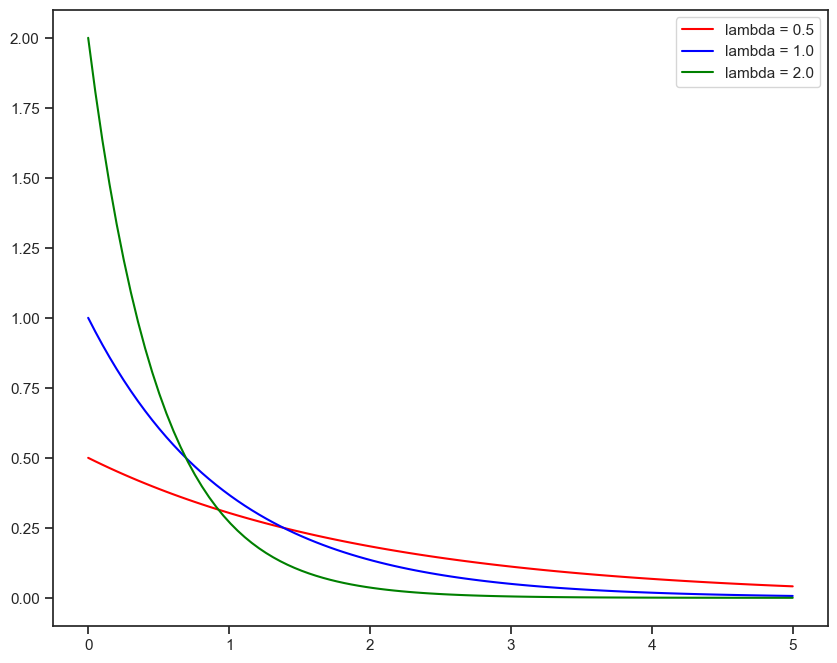

In [84]:
x = np.linspace(0, 5, num = 100)
lambdas = [.5, 1., 2.]
colors = ['red', 'blue', 'green']

for i in range(len(lambdas)):
    sns.lineplot(x=x, y=scipy.stats.expon.pdf(x, loc = 0, scale = 1/lambdas[i]),
             color = colors[i], label = "lambda = {}".format(lambdas[i]))

## Simulations

<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" alt="Monte Carlo">

Source: [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)

In [86]:
sizes = [10**i for i in range(2, 8)]
for n in sizes:
    X = np.random.uniform(size = n)
    Y = np.random.uniform(size = n)
    pi_approx = np.mean(X**2 + Y**2 < 1) * 4
    print("We approximate pi to {} using n = {}".format(pi_approx, n))
print("We compare with pi to {} using np.pi".format(np.pi))

We approximate pi to 3.12 using n = 100
We approximate pi to 3.18 using n = 1000
We approximate pi to 3.1636 using n = 10000
We approximate pi to 3.14388 using n = 100000
We approximate pi to 3.141288 using n = 1000000
We approximate pi to 3.141204 using n = 10000000
We compare with pi to 3.141592653589793 using np.pi


Simulation enables data scientists to study the stochastic behavior of processes with complex probability distributions. Simple processes might be approximated by a known, or 'named' distribution. In these simple cases, it might even be possible to derive analytical results. However, many real-world processes have complex behavior, resulting in complex distributions of output values. In these cases, simulation is a practical approach to understanding these processes. 

As cheap computational power has become ubiquitous, simulation has become a widely used technique in the data scientist's tool box. Simulations compute a large number of cases, or realizations, of the process being studied. The final or posterior distribution of the process being simulated is comprised of these realizations. The computing cost of each realization must be low in any practical simulation. 

Data scientists use simulation for a number of purposes:

- Simulation is used to test models. If data simulated from the model do not resemble the original data, something is likely wrong with the model.
- Simulation is used to understand processes with complex distributions. In these cases, simulation provides a powerful and flexible computational technique to understand this behavior.  

In this notebook you will create a simulation of a process with a complex distribution. 

Creating, testing and debugging simulation software can be tricky. Some of the techniques which can make your life easier are the same as you should use when developing any analytics software, or even software in general. These techniques include:

- Build your simulation as a series of small, easily tested chunks. In practice, this means you will build your simulation by creating and testing a set of small functions that comprise the overall model.
- Test each small functional unit individually. These tests should include at least testing some typical cases, as well as boundary or extreme cases. Sensible behavior with extreme or limiting cases is a requirement for a stable simulation. Both tabular and graphical output can be useful for evaluating tests.
- Test your overall simulation each time you add a new functional component. This processes ensures that all the pieces work together. 
- Simulations are inherently stochastic. If you want to create identical numerical results, say for automated testing, set a seed before you begin tests. In this notebook no seed is set so you can experience the stochastic nature of the simulation. 

### Exercise

Let's say that families keep having children until they have a girl, at which point they stop. The probability of having a girl and the probability of having a boy is 50 percent each.

1. What is the probability that a family has 3 boys and a girl?
1. What is the probability that a family has **at most** 3 boys and a girl?
1. What is the percentage of boys in the **overall population** (not per family)?
1. What is the average percentage of boys **per family**?

The type of distribution we are describing here is a **hyper-geometric distribution**: The hyper-geometric distribution is a discrete distribution that models the number of Bernoulli trials until a successful event. So $P(X = k|p) = (1-p)^{k-1}p$. Although it's easy to do the math in this case, we can also just use `scipy.stats.geom.pmf(k, p)` to get the answer.

- Find the answer to (1) using `scipy.stats.geom.pmf`.

In [87]:
scipy.stats.geom.pmf(4,.5)

np.float64(0.0625)

- Find the answer to (2) using `scipy.stats.geom.pmf(k, p)`. Compare you answer to what you get if you use `scipy.stats.geom.cdf(k, p)` instead (the cumulative distribution).

In [89]:
1-scipy.stats.geom.pmf(4,.5),scipy.stats.geom.cdf(4,.5)

(np.float64(0.9375), np.float64(0.9375))

Even though the geometric distribution and the binomial distributions are both based on Bernoulli trials, they capture different things: In the binomial distribution, the number of trials $n$ is fixed, as is the probability of success $p$, and the random variable $X$ is the number of successful trials. In the geometric distribution, the number of successful trials is just 1, and the random variable $X$ is the number of total trials, which is also the number of failed trials plus one, since the last trial is a success.

- Approximate the answers to (1) and (2) by generating random variables from the geometric distribution using `np.random.geometric(p, size)`. Note that `size` is just the number of random variables we wish to generate.

In [112]:
sample = pd.DataFrame(np.random.geometric(p=0.5,size=1000),columns=['number_of_children'])
sample.value_counts(normalize=True)

number_of_children
1                     0.527
2                     0.227
3                     0.114
4                     0.064
5                     0.029
6                     0.021
7                     0.010
10                    0.003
8                     0.002
9                     0.002
12                    0.001
Name: proportion, dtype: float64

In [115]:
est_of_4 = sample.value_counts(normalize=True)[4]

est_of_4, 1-est_of_4

(np.float64(0.064), np.float64(0.9359999999999999))

- Now approximate the answers to (3) using the sample you generated above.

In [125]:
boys = sample - 1 
boys[boys>0].value_counts(),boys[boys>0].sum()

(number_of_children
 1.0                   227
 2.0                   114
 3.0                    64
 4.0                    29
 5.0                    21
 6.0                    10
 9.0                     3
 7.0                     2
 8.0                     2
 11.0                    1
 Name: count, dtype: int64,
 number_of_children    996.0
 dtype: float64)

In [126]:
boys[boys>0].sum() / sample.sum() * 100

number_of_children    49.8998
dtype: float64

- Now approximate the answers to (4) using the sample you generated above.

In [127]:
boys[boys>0].sum() / sample.count()

number_of_children    0.996
dtype: float64

### End of exercise

So we looked at examples of specific probability distributions which are there to model real-life discrete or continuous events. We then saw how we can draw random numbers from these distributions to generate samples and run calculations on them, which is especially handy when what we're trying to estimate cannot be *analytically* derived (or not easily at least). The simulation examples we saw above are a good warmup for the assignment.